In [15]:
# please don't juge the code in this file, it was 4am and I was tired
import json
import sys
import os

output_dir = "../output/report_output/2_agents/"
# get the path of each folder in the output folder
folders = os.listdir(output_dir)
# get the json files in each folder
data_simple = {}
for folder in folders:
    # list each file that ends with .json
    if "interm" in folder:
        continue
    try:
        files = os.listdir(output_dir + folder)
    except Exception as e:
        print(e, file=sys.stderr)
    files = [file for file in files if file.endswith('.json')]
    # print(files)
    try:
        with open(output_dir + folder + '/' + 'config.json') as f:
            json_data = json.load(f)
            # try:
            #     print(json_data['filename'], folder)
            # except:
            #     continue
            #     # remove the folder from the data
    except Exception as e:
        print(e, file=sys.stderr)
        continue
    
    data_simple[folder] = {}
    for file in files:
        with open(output_dir + folder + '/' + file) as f:
            json_data = json.load(f)
            data_simple[folder][file] = json_data



In [22]:
print(len(data_simple))
plot_data = {}

for run in data_simple:
    try:
        filename = str(data_simple[run]['config.json']['filename'])
        players = data_simple[run]['config.json']['players']
    except KeyError:
        print(f"Missing 'config.json' or its keys in folder {run}")
        continue

    if filename not in plot_data:
        plot_data[filename] = {'True': 0, 'False': 0, 'Missing': 0}

    try:
        solved_status = str(data_simple[run]['result.json']['solved'])
        if solved_status in ['True', 'False']:
            plot_data[filename][solved_status] += 1
        else:
            print(f"Unexpected 'solved' value in folder {run}")
    except KeyError:
        print(f"Missing 'result.json' or 'solved' key in folder {run}")
        plot_data[filename]['Missing'] += 1

# get the statistics for each backend vs. backend
print(plot_data)

193
Missing 'result.json' or 'solved' key in folder A_Mistral_D_Mistral_simple_20231001_235915
Missing 'result.json' or 'solved' key in folder A_Mistral_D_Mistral_simple_20231002_000126
{'envs/2-agents/hard/2-agents-mistralvs3.json': {'True': 0, 'False': 10, 'Missing': 0}, 'envs/2-agents/hard/2-agents-4vs3.json': {'True': 2, 'False': 8, 'Missing': 0}, 'envs/2-agents/simple/2-agents-3vs4.json': {'True': 0, 'False': 10, 'Missing': 0}, 'envs/2-agents/hard/2-agents-4vs4.json': {'True': 0, 'False': 10, 'Missing': 0}, 'envs/2-agents/hard/2-agents-3vsmistral.json': {'True': 2, 'False': 8, 'Missing': 0}, 'envs/2-agents/simple/2-agents-4vsmistral.json': {'True': 7, 'False': 3, 'Missing': 0}, 'envs/2-agents/hard/2-agents-4vsmistral.json': {'True': 6, 'False': 4, 'Missing': 0}, 'envs/2-agents/simple/2-agents-mistralvsmistral.json': {'True': 2, 'False': 16, 'Missing': 2}, 'envs/2-agents/simple/2-agents-4vs4.json': {'True': 1, 'False': 9, 'Missing': 0}, 'envs/2-agents/hard/2-agents-mistralvs4.json'

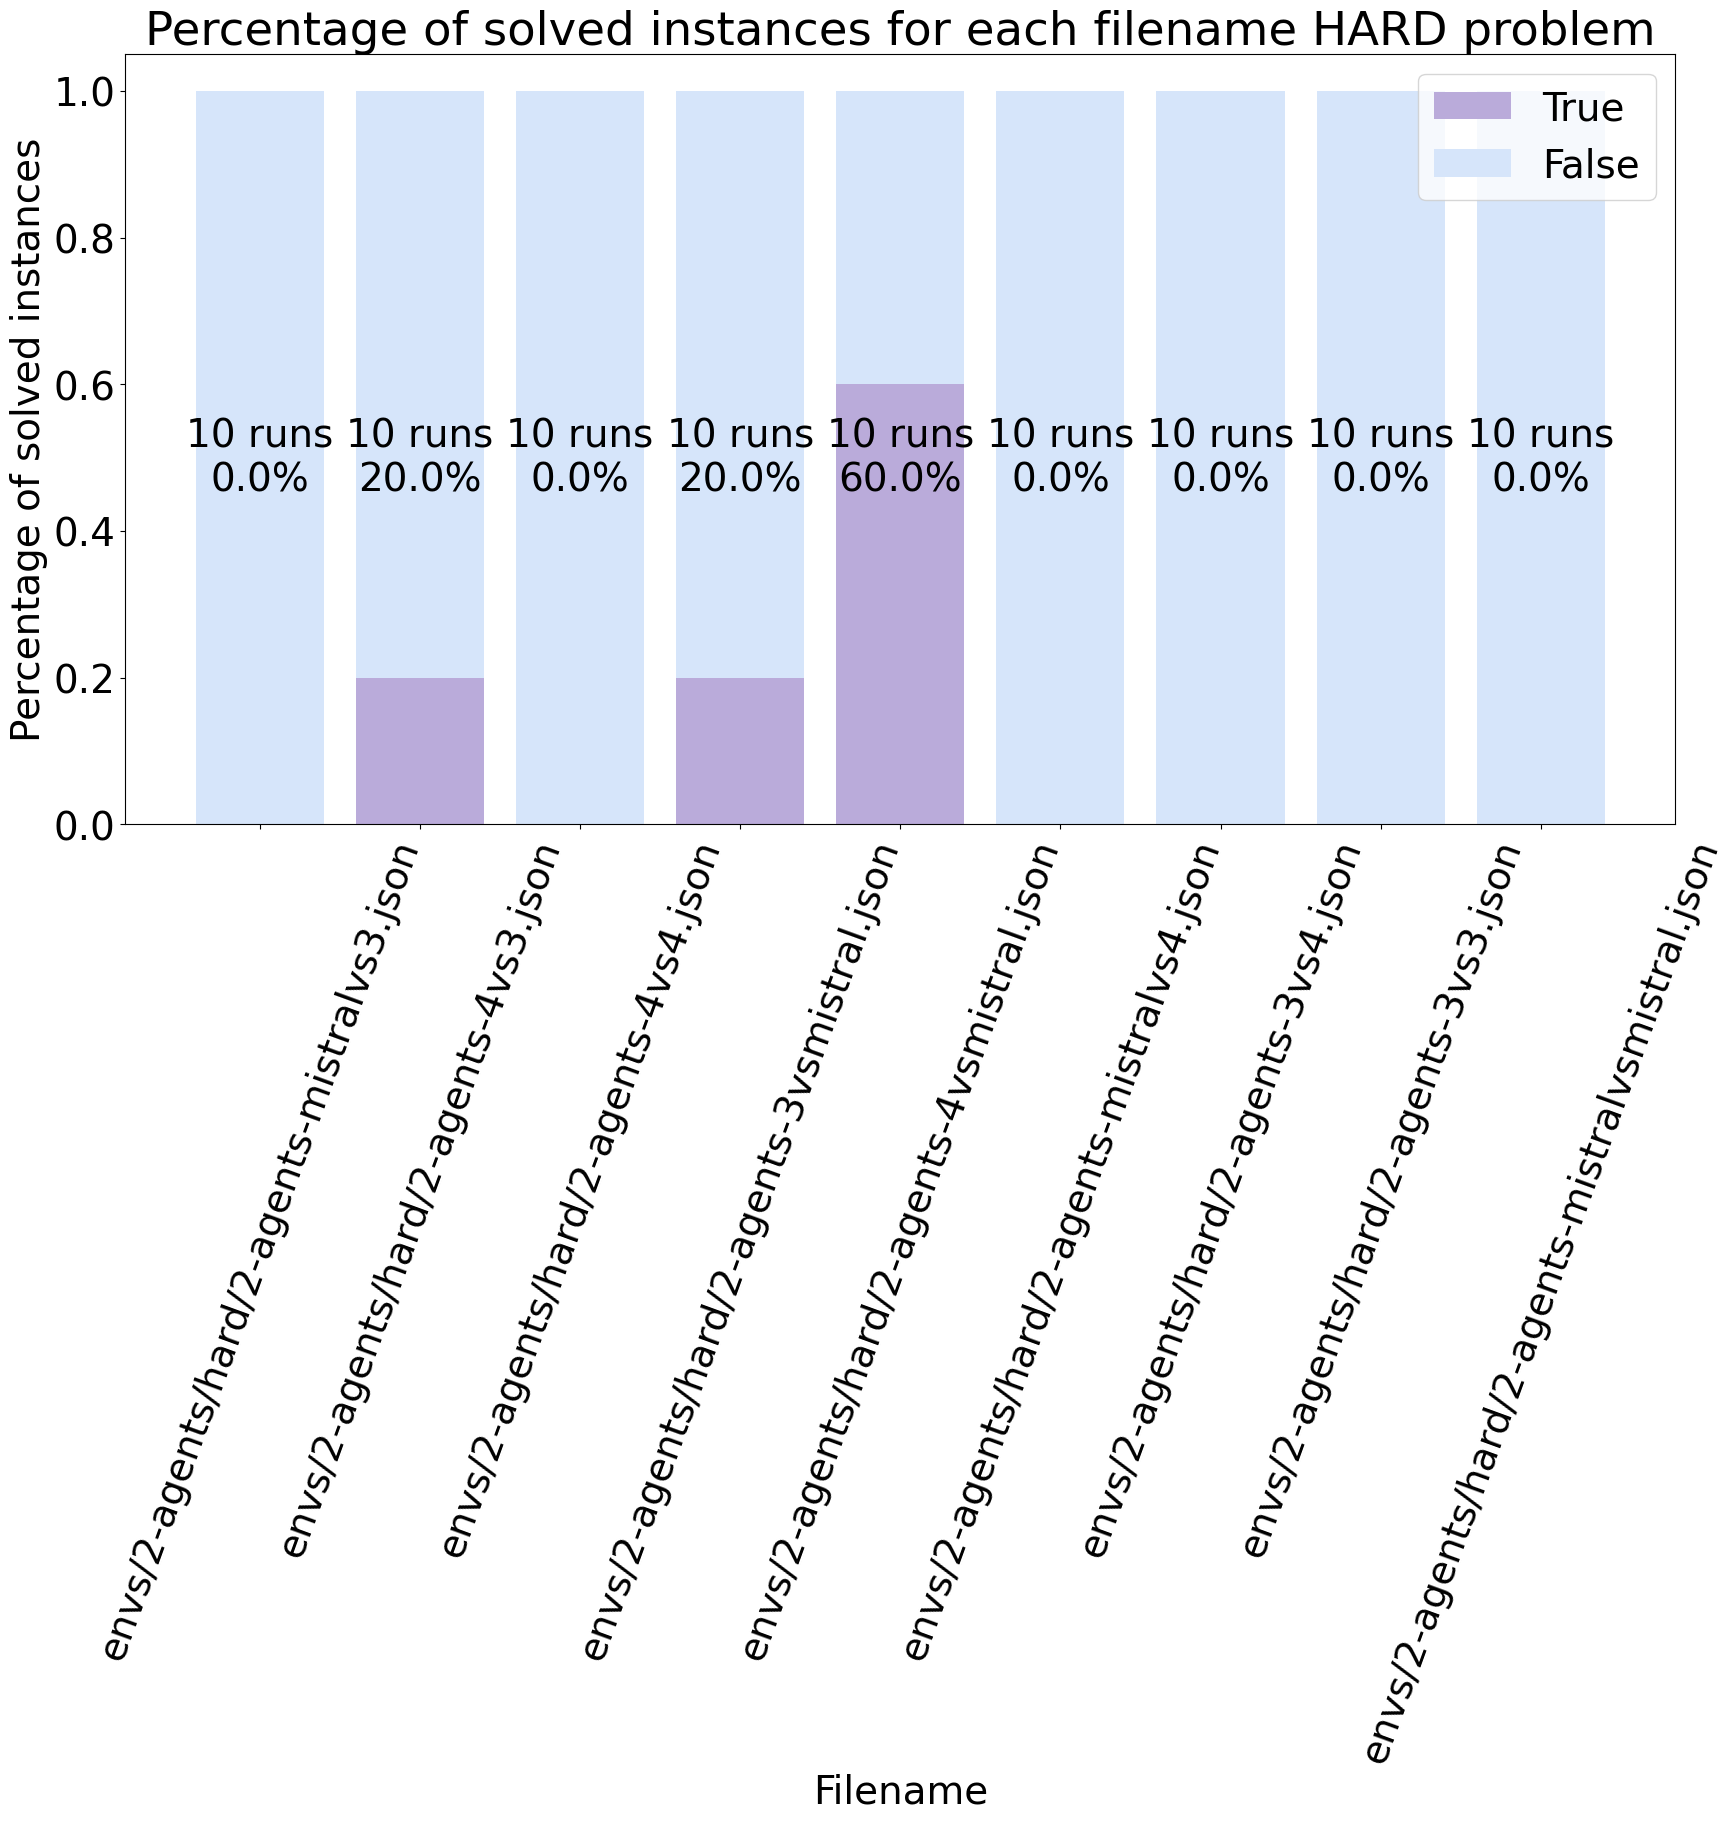

In [28]:
import matplotlib.pyplot as plt

# plot the percentage of true, false and missing for each filename
plt.figure(figsize=(20, 10))
plt.title('Percentage of solved instances for each filename HARD problem')
plt.xlabel('Filename')
plt.ylabel('Percentage of solved instances')

for filename in plot_data:
    if "simple" in filename:
        continue
    true = plot_data[filename]['True']
    false = plot_data[filename]['False']
    missing = plot_data[filename]['Missing']
    if filename in {
        'A_Mistral_D_Mistral_simple_20231001_235915',
        'A_Mistral_D_Mistral_simple_20231002_000126'
    } and missing != 0:
        false += missing
    elif missing != 0:
        raise Exception(f"Unexpected 'missing' value for {filename}")
    else:
        pass
    total = true + false

    plt.bar(filename, true / total, color='#BAABDA')
    plt.bar(filename, false / total, bottom=true / total, color='#D6E5FA')
    # plt.bar(filename, missing / total, bottom=(true + false) / total, color='#FF0000')

    # add total number of instances
    true_percentage = round(true / total * 100, 2)
    plt.text(filename, 0.5, str(total) +' runs\n'+str(true_percentage)+'%', ha='center', va='center')

# rotate the xticks
plt.xticks(rotation=70)
plt.legend(['True', 'False'])
plt.show()

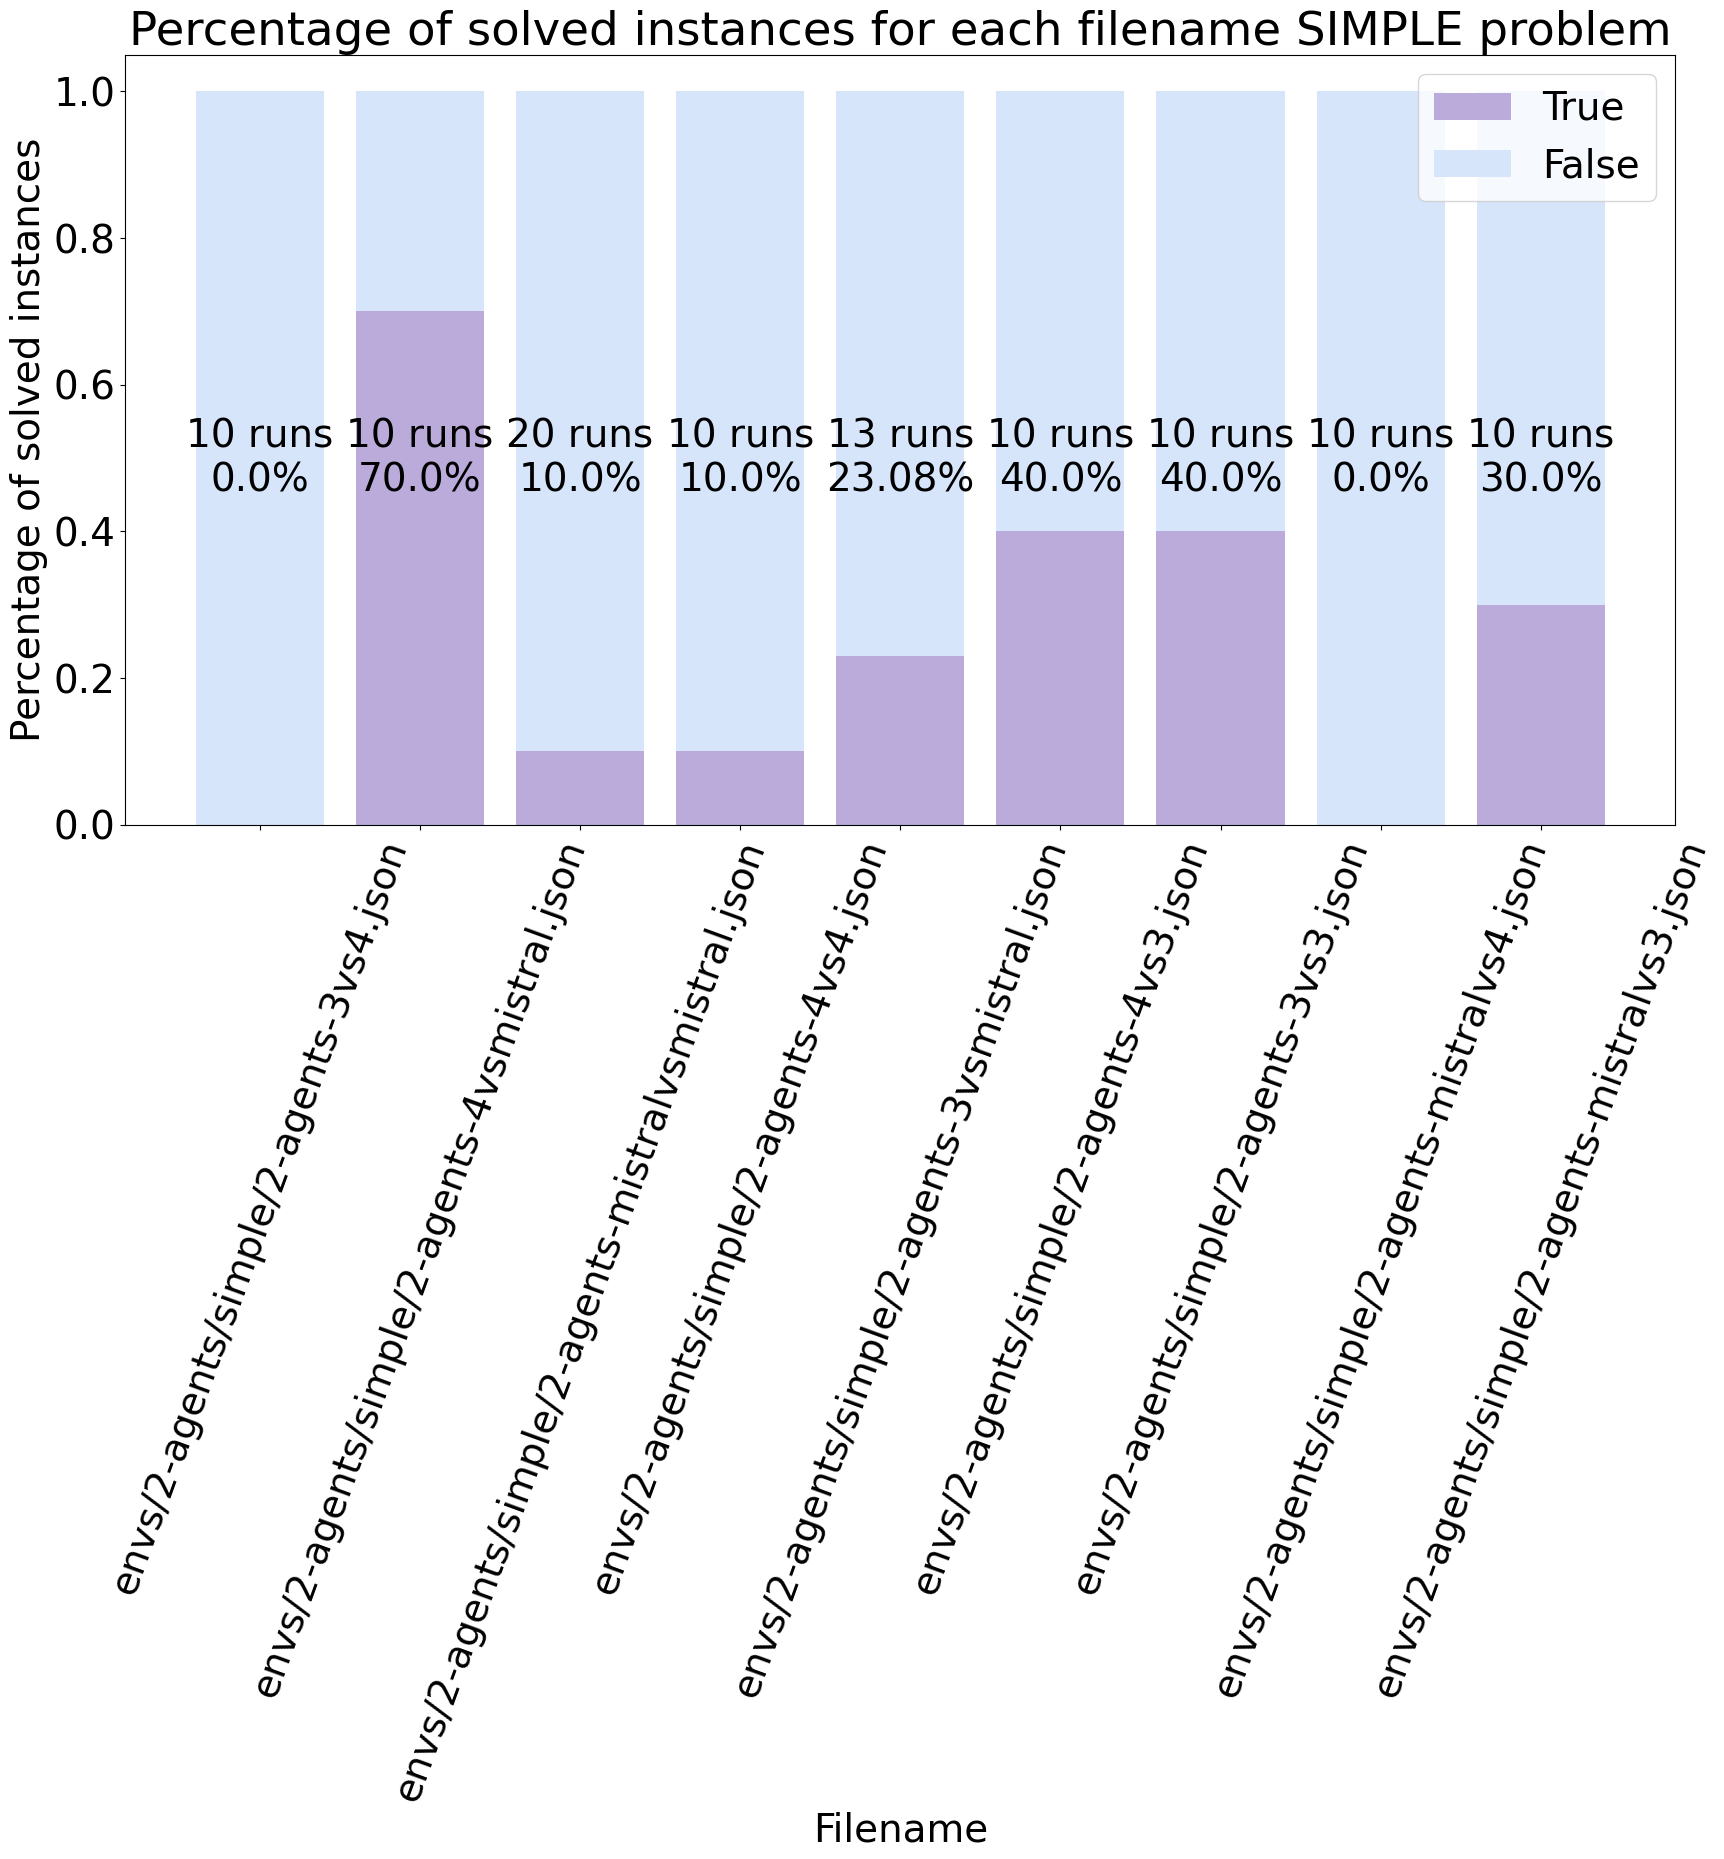

In [31]:
# plot the data for each filename
import matplotlib.pyplot as plt

# plot the percentage of true and false for each filename
plt.figure(figsize=(20, 10))
plt.title('Percentage of solved instances for each filename SIMPLE problem')
plt.xlabel('Filename')
plt.ylabel('Percentage of solved instances')

for filename in plot_data:
    if "hard" in filename:
        continue
    true = plot_data[filename]['True']
    false = plot_data[filename]['False']
    missing = plot_data[filename]['Missing']
    if filename in {
        'envs/2-agents/simple/2-agents-mistralvsmistral.json'
    } and missing != 0:
        false += missing
    elif missing != 0:
        raise Exception(f"Unexpected 'missing' value for {filename}")
    else:
        pass
    total = true + false

    plt.bar(filename, true / total, color='#BAABDA')
    plt.bar(filename, false / total, bottom=true / total, color='#D6E5FA')
    # plt.bar(filename, missing / total, bottom=(true + false) / total, color='#FF0000')

    # add total number of instances
    true_percentage = round(true / total * 100, 2)
    plt.text(filename, 0.5, str(total) +' runs\n'+str(true_percentage)+'%', ha='center', va='center')

# rotate the xticks
plt.xticks(rotation=70)
plt.legend(['True', 'False'])
plt.show()

['/2-agents/hard/2-agents-mistral', '3.json']
['/2-agents/hard/2-agents-4', '3.json']
['/2-agents/hard/2-agents-4', '4.json']
['/2-agents/hard/2-agents-3', 'mistral.json']
['/2-agents/hard/2-agents-4', 'mistral.json']
['/2-agents/hard/2-agents-mistral', '4.json']
['/2-agents/hard/2-agents-3', '4.json']
['/2-agents/hard/2-agents-3', '3.json']
['/2-agents/hard/2-agents-mistral', 'mistral.json']


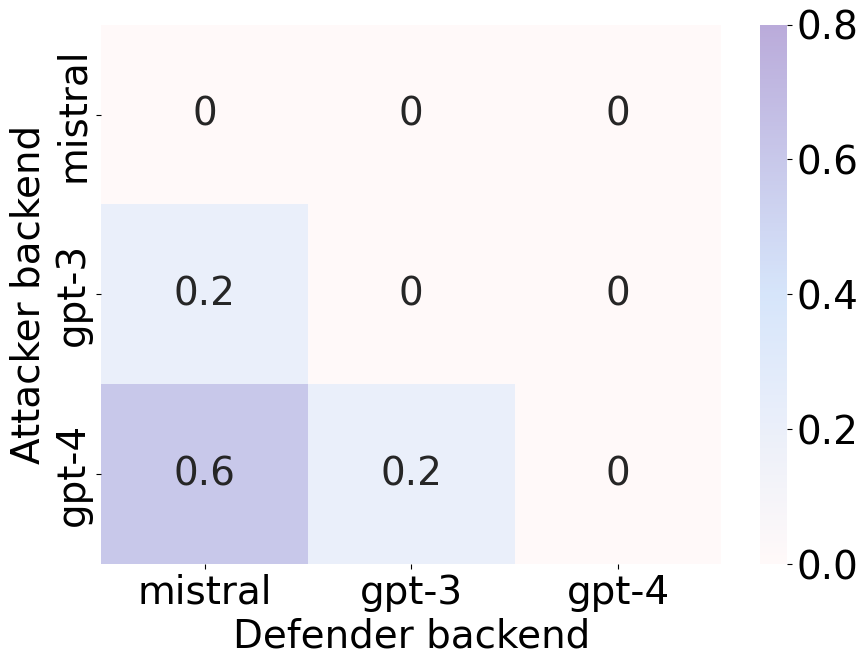

['/2-agents/simple/2-agents-3', '4.json']
['/2-agents/simple/2-agents-4', 'mistral.json']
['/2-agents/simple/2-agents-mistral', 'mistral.json']
['/2-agents/simple/2-agents-4', '4.json']
['/2-agents/simple/2-agents-3', 'mistral.json']
['/2-agents/simple/2-agents-4', '3.json']
['/2-agents/simple/2-agents-3', '3.json']
['/2-agents/simple/2-agents-mistral', '4.json']
['/2-agents/simple/2-agents-mistral', '3.json']


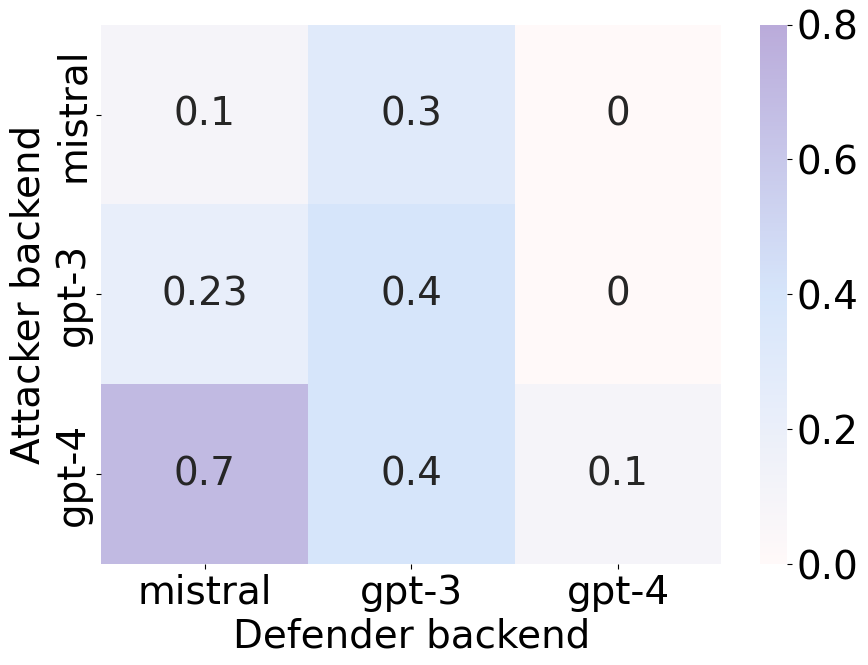

In [34]:
# plot everything in a confusion matrix
import numpy as np
import matplotlib
types= ["simple", "hard"]
for type in ["simple", "hard"]:
    # get the data for each filename
    # possible backends "4", "3", "mistral"
    data_simple = {}
    for key in plot_data:
        if type in key:
            continue
        splitted_key = key[4:].split("vs")
        attacker_backend = ""
        print(splitted_key)
        if "4" in splitted_key[0]:
            attacker_backend = "gpt-4"
        elif "3" in splitted_key[0]:
            attacker_backend = "gpt-3"
        elif "mistral" in splitted_key[0]:
            attacker_backend = "mistral"
        defender_backend = ""
        if "4" in splitted_key[1]:
            defender_backend = "gpt-4"
        elif "3" in splitted_key[1]:
            defender_backend = "gpt-3"
        elif "mistral" in splitted_key[1]:
            defender_backend = "mistral"
        else:
            print("ERROR")
        if defender_backend not in data_simple:
            data_simple[defender_backend] = {}
        true = plot_data[key]['True']
        false = plot_data[key]['False']
        missing = plot_data[key]['Missing']
        if key in {
            'envs/2-agents/simple/2-agents-mistralvsmistral.json'
        } and missing != 0:
            false += missing
        elif missing != 0:
            raise Exception(f"Unexpected 'missing' value for {key}")
        else:
            pass
        data_simple[defender_backend][attacker_backend] = true / (true + false)

    # get the data for each backend

    # plot the data in a confusion matrix
    import seaborn as sn
    import pandas as pd
    import tikzplotlib

    order = ["mistral", "gpt-3", "gpt-4"]
    df_cm = pd.DataFrame(data_simple, index = order, columns = order)
    plt.figure(figsize = (10,7))
    plt.rcParams.update({'font.size': 28})
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#FFF9F9", "#D6E5FA", "#BAABDA"])
    sn.heatmap(df_cm, annot=True, cmap=cmap, vmax=0.8)
    # plt.title("Percentage of solved instances for each backend " + [i for i in types if i is not type][0] + " problem")
    plt.xlabel("Defender backend")
    plt.ylabel("Attacker backend")
    plt.savefig("../output/imgs/heatmap_" + type + ".pdf", format="pdf", bbox_inches='tight')
    # tikzplotlib.save("../output/imgs/heatmap_" + type + ".tex")
    plt.show()